<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/21%20-%20Sklearn%20%3A%20Model%20Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4   Evaluation des performances - Sélection de Modèles 
# TP 4.1 : Prise en main de l'évaluation 
**IMPRTANT** : 
L'évaluation des perfomances d'un algotrithme d'apprentissage ne se fait JAMAIS sur les données utilisées pour l'apprentissage.
Elle se fait sur des données que l'algorithme (la méthode) n'a jamais vues auparavant. 

On parle alors de <span style="color:green"> ``train_set``</span> (ensemble d'entrainement) et <span style="color:green"> ``test_set``</span> (ensemble de test)
*SkLearn* nous offre la possibilité de couper un ensemble de données en $train\_set$ et $test\_set$ grace à <br>
``from sklearn.model_selection import train_test_split``

Sklearn propose aussi plusieurs  [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets), on peut les lire directement à partir du module ``from sklearn.datasets import ......?``. Importer le dataset à utiliser.

### Métriques d'évaluation des modèles
- **Problèmes de classification** : Accuracy, Précision (precision), Confusion Matrix (matrice de confusion)

- **Problèmes de régression** : Mean Absolute Error (Erreur absolue moyenne), Mean Squared Error (erreur quadratique moyenne), Root Mean Squared Error Racine de erreur quadratique moyenne)

<span style="color:green"> **from sklearn.metrics import accuracy_score, ...** </span>


In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes #IRIS est un dataset comportant des images des IRIS (déjà vu en 1ère année)
from sklearn.preprocessing import  RobustScaler


## Objectifs du TP  :  
- Utilisation de différents algorithmes d'apprentissage sur deux cas 
- cas 1 : Entrainement et test sur les mêmes données
- cas 2 : Entrainement sur des données d'apprentissage et test dsur des données de test.


## Cas 1 : Entrainement et test sur les mêmes données

### Le dataset

In [179]:
# Le dataset Titanic  

import pandas as pd 
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
# Partictionner les données X_train et y_train
titanic = titanic[['Survived','Pclass', 'Sex','Age']]
X_features = ['Pclass','Sex','Age']
titanic.dropna(axis=0,inplace=True)
titanic['Sex'].replace(['male','female'], [0,1], inplace=True)
titanic.head()
X_train= titanic[X_features]
y_train= titanic['Survived']
print(X_train.shape)
print(y_train.shape)


(714, 3)
(714,)


### Régression logistique ?

In [181]:
## On utilise une regresion logistique
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
lgPred = model_lg.predict(X_train)
# test sur test_set



### KNN k=3

In [182]:
# On utiisera un KNN k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier
# On prend un modèle avec un voisin k=3
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train 
model_knn.fit(X_train, y_train)

# predict sur X_train
knnPred = model_knn.predict(X_train)

### Evaluation des performances 

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [184]:
print('Accuracy sur le test :',accuracy_score(y_train,knnPred))
print('precision sur le test :', precision_score(y_train,knnPred))
print('F1  sur le test :', f1_score(y_train,knnPred))


Accuracy sur le test : 0.8627450980392157
precision sur le test : 0.8870967741935484
F1  sur le test : 0.8178438661710038


## Cas 2 : Eval sur des données de test.  (Train Test Split)
1) Entraînement et test sur les mêmes données
    - Récompense les modèles trop complexes qui "surajoutent" les données d'apprentissage et ne se généralisent pas nécessairement.
2) Séparation Training/test
    - Diviser l'ensemble de données en deux parties, de sorte que le modèle puisse être entraîné et testé sur des données différentes.
    - Meilleure estimation des performances hors échantillon
3) Validation croisée K-fold
    - Création systématique de "K" folds (divisions) training/test et calcul de la moyenne des résultats.
    - Meilleure estimation des performances hors échantillon
    - S'exécute "K" fois plus lentement que le train/test strategie




### from sklearn.model_selection import train_test_split
SKlearn propose la méthode train_test_split dans le module sklearn.model_selection (penser à aller visiter ce module) **from sklearn.model_selection import train_test_split**<br>
le code :  *train_test_split(X, y, test_size=0.2, random_state=5)*
les paramètres de train_test_split:
- (X et y données du dataset (X les features) et y (le resulltat souhaité))
- test_size est le pourcentage de données de test ici 0.2 (20%), 
- random_state ? pour indiquer que les données soient mélangées aléatoirement pour éviter les biais 


In [185]:
from sklearn.model_selection import train_test_split

### Spliter les données  (20% test et le reste training) ?
- SPliter le dataset et vérifier la dimension de vos données

In [186]:
# les paramètres de train_test_split (X et y données du dataset (X les fatures) et Y (le resulltat souhaité))
# test_sizet est le pourcentage de données de test ici 0.2 (20%), random_state ? pour indiquer q
# ue les données soient mélangées aléatoirement pour  éviter les biaias 
X_train, X_test, y_train, y_test = train_test_split(titanic[X_features], titanic["Survived"], test_size=0.2, random_state=5)


###  Régression logistique ? 

In [187]:
## On utilise une regresion logistique
#le modèle
model_lg = LogisticRegression()

# training
model_lg.fit(X_train, y_train)
# test sur test_set
y_pred_lg = model_lg.predict(X_test)
y_pred_lgTrain = model_lg.predict(X_train)

### KNN k=3 ?

In [188]:
# On utiisera un KNN k plus proches voisins
from sklearn.neighbors import KNeighborsClassifier
# On prend un modèle avec un voisin k=3
knnPred = KNeighborsClassifier(n_neighbors=3)
# training 
knnPred.fit(X_train, y_train)
# prediction sur les données de test
y_pred_knn = knnPred.predict(X_test)

In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Comparer les performance des différents modèles pour les deux cas étudiés?

In [190]:
print ('**** Performances Logistique régression ****')

print('Accuracy sur le training :', accuracy_score(y_train, y_pred_lgTrain ))
print('precision sur le traing :', precision_score(y_train, y_pred_lgTrain ))
print('F1  sur le training :', f1_score(y_train, y_pred_lgTrain ))       
print('Accuracy sur le test :', accuracy_score(y_test, y_pred_lg))
print('precision sur le test :', precision_score(y_test, y_pred_lg))
print('F1  sur le test :', f1_score(y_test, y_pred_lg))
print ('**** Performances KNN ****')  
print('Accuracy sur le training :', accuracy_score(y_train, y_pred_lgTrain ))
print('precision sur le traing :', precision_score(y_train, y_pred_lgTrain ))
print('F1  sur le training :', f1_score(y_train, y_pred_lgTrain ))
print('Accuracy sur le test :', accuracy_score(y_test, y_pred_knn ))
print('precision sur le test :', precision_score(y_test, y_pred_knn))
print('F1  sur le test :', f1_score(y_test, y_pred_knn))

**** Performances Logistique régression ****
Accuracy sur le training : 0.8056042031523643
precision sur le traing : 0.7844036697247706
F1  sur le training : 0.7549668874172186
Accuracy sur le test : 0.7482517482517482
precision sur le test : 0.6727272727272727
F1  sur le test : 0.6727272727272727
**** Performances KNN ****
Accuracy sur le training : 0.8056042031523643
precision sur le traing : 0.7844036697247706
F1  sur le training : 0.7549668874172186
Accuracy sur le test : 0.7202797202797203
precision sur le test : 0.6190476190476191
F1  sur le test : 0.6610169491525425


### Matrice de confusion
La matrice de confusion est un autre moyen qui permeet de visualiser es résultats. 


In [191]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [192]:
confusion_matrix(y_test, y_pred_lg, labels=model_lg.classes_)

array([[70, 18],
       [18, 37]], dtype=int64)

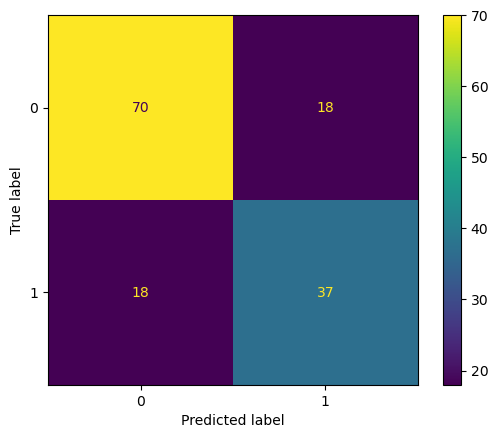

In [193]:
#m=confusion_matrix(y_test, y_pred_lg)
m = confusion_matrix(y_test, y_pred_lg, labels=model_lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=model_lg.classes_)
disp.plot()


# Exercice 1:
Reprendre le même travail  (démarche) pour le cas d'une régression linéaire. Les métriques sont différentes. Comparer deux modèles d'apprentissage, par exemple un LinearRegression et un Ridge avec (alpha=.5)

 On fera juste le cas 2, qui représente la démarche normale d'évaluation d'un modèle d'apprentissage 
- Lire les données du fichier house.txt
- Spliter les données (attention le fichier houses, comporte tous les *features* et les *labels*. Il faut les séparer.
- choisir le (s) modèle(s) de regression, entrainer-le(s), puis tester.
- afficher les scores des performznces : MAE, MSE, RMSE et R2.

### Le Dataset

In [194]:
data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
X = data[:,:4]
y = data[:,4] # X soit les 4 premières colonnes, y la dernière colonne
# récupérer toutes les lgnes data[:, et les 4 premières colonnes data[ ..,:4]
X_features = ['size','bedrooms','floors','age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Choix du modèle, entrainement, test ?

In [195]:
# import model
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
# fit the model to the training data (learn the coefficients)
lg.fit(X_train, y_train)
# test 
y_pred_lg = lg.predict(X_test)

### Evaluation des performances ?
Utiliser les 4 measures étudiées au cours : r2_score, mean_absolute_error, rmse, mean_squared_error

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [197]:
print('MAE :', mean_absolute_error(y_test, y_pred_lg))
print('MSE :', mean_squared_error(y_test, y_pred_lg))
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_lg)))
print('R2 score :', r2_score(y_test, y_pred_lg))

MAE : 17.77608793922877
MSE : 490.69242139501165
RMSE : 22.151578304829922
R2 score : 0.9344663298120052


## Exercice 2:
Reprendre le même travail (démarche) pour une classification multiclasses, prendre le dataset iris.
Attention : à la régression logistique (vérifier le paramètrage) et aux métriques. 

In [198]:
# import iris
iris = load_iris()
X_features = iris.feature_names # 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
y_target = iris.target_names #'setosa' 'versicolor' 'virginica'
#on donne les features a X et a Y
X = iris.data
y = iris.target

In [199]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier
# on va diviser le dataset en 3 partie
knn = KNeighborsClassifier(n_neighbors=10)

In [200]:
# on va créer les données train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
#entrainement
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [201]:
#test
y_pred_knn = knn.predict(X_test)

In [202]:
#evaluation
print('Accuracy sur le test :', accuracy_score(y_test, y_pred_knn ))
print('precision sur le test :', precision_score(y_test, y_pred_knn, average='macro'))
print('F1  sur le test :', f1_score(y_test, y_pred_knn, average='macro'))

Accuracy sur le test : 0.9666666666666667
precision sur le test : 0.9722222222222222
F1  sur le test : 0.9696342305037957


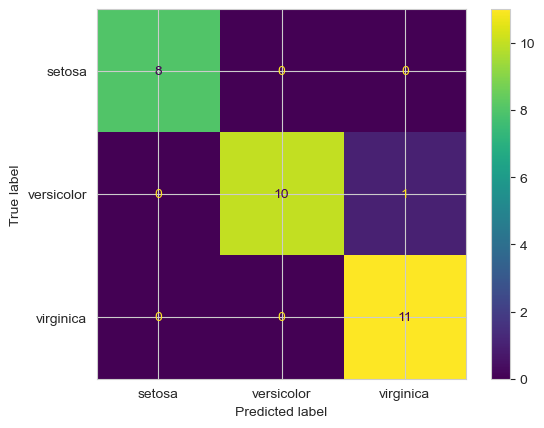

In [209]:
#matrice de confusion
m = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=m, display_labels=load_iris().target_names)
disp.plot()

Text(0, 0.5, 'Sepal Width')

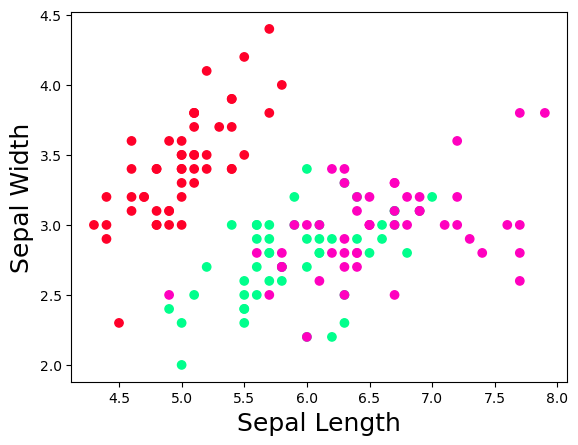

In [204]:
# graphiques via les données pour visualiser avec PLT
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [206]:
# graphiques avec SNS
import seaborn as sns

#régler cette erreur : TypeError: 'data' must be pandas DataFrame object, not: <class 'sklearn.utils._bunch.Bunch'>

# convertir le dataset en dataframe
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


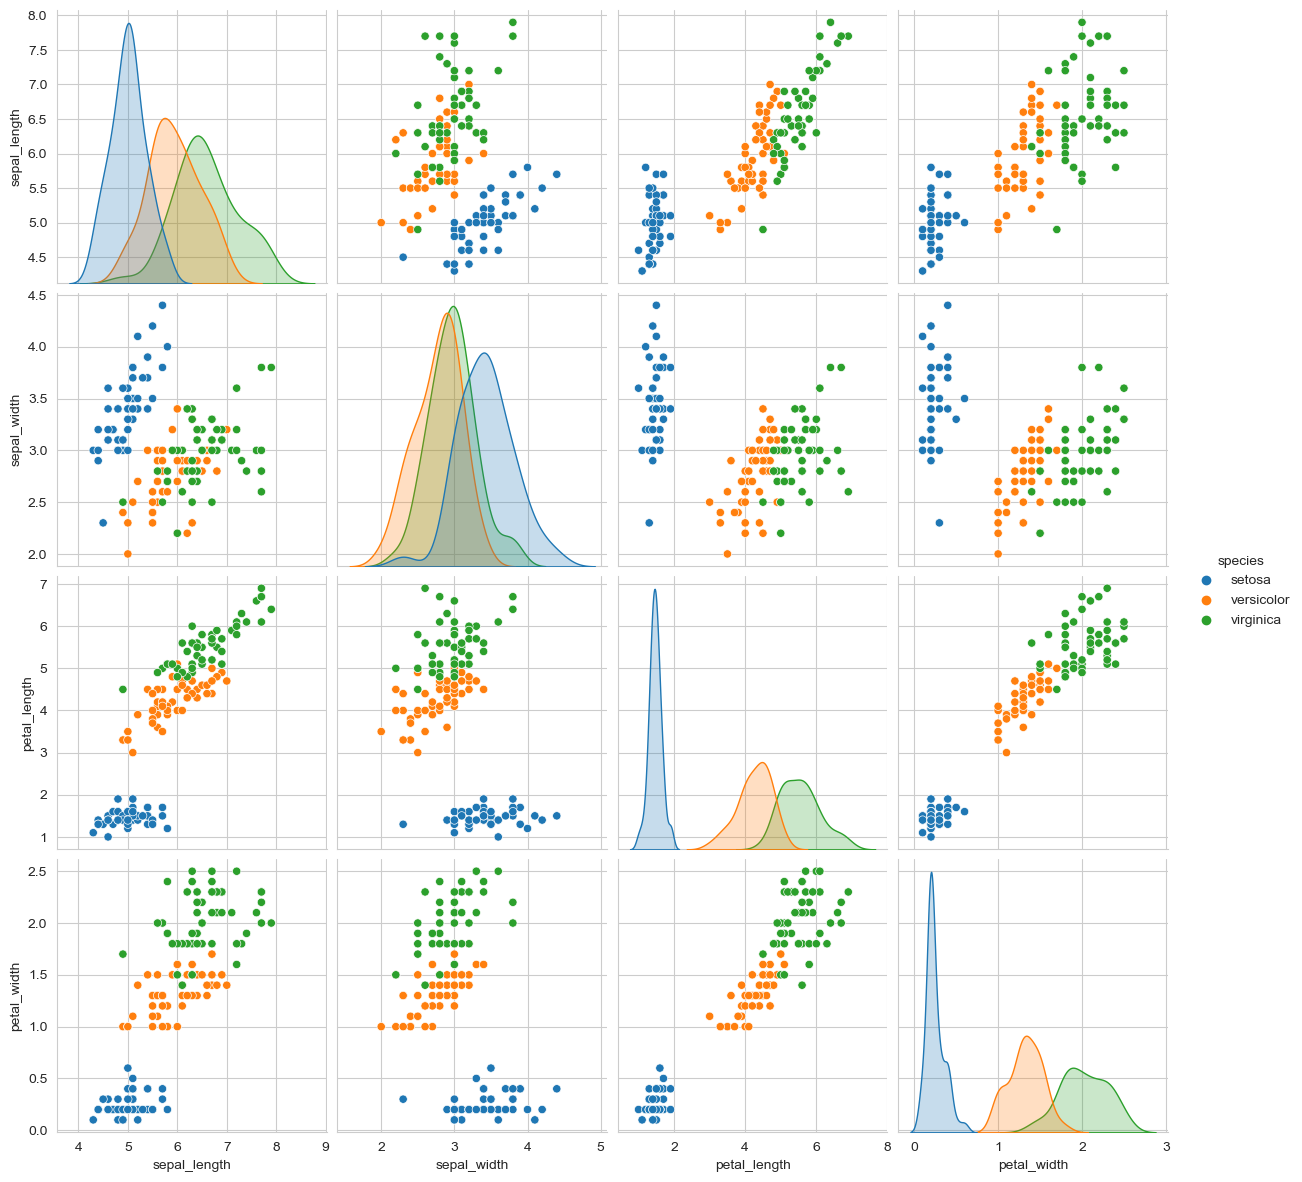

In [207]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", height=3);